In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.calibration import LabelEncoder

# Importando os Dados
É importante observar que a planilha de formulações foi unida à planilha com as informações sobre os lipídios.

In [117]:
df = pd.read_csv('FormulacoesNano.csv', sep=';', encoding='utf-8-sig')
df.head()

,formulacao,manteiga_1,manteiga_2,oleo,perc_manteiga_1,perc_manteiga_2,perc_tensoativo,pdi,tamanho,Translucida,...,Perc_Ac_Caprico2,Perc_Ac_Laurico2,Perc_Ac_Miristico2,Perc_Ac_Palmitoleico2,Perc_Ac_Beenico2,Perc_Ac_Valerico2,Perc_Ac_Araquidico2,Perc_Outros2,Perc_AG_Saturados2,Perc_AG_Insaturados2
0,1,Tucumã,0,Tucumã,25.00,0.0,50.00,0.104,31.49,1,...,0.0,0,0.0,0.0,0.0,0.0,NaN,0.0,27.0,73.0
1,2,Tucumã,0,Tucumã,16.65,0.0,33.35,0.131,91.71,1,...,0.0,0,0.0,0.0,0.0,0.0,NaN,0.0,27.0,73.0
2,3,Tucumã,0,Tucumã,50.00,0.0,33.35,0.135,87.85,1,...,0.0,0,0.0,0.0,0.0,0.0,NaN,0.0,27.0,73.0
3,4,Tucumã,0,Tucumã,37.50,0.0,25.00,0.252,105.20,0,...,0.0,0,0.0,0.0,0.0,0.0,NaN,0.0,27.0,73.0
4,5,Tucumã,0,Tucumã,25.00,0.0,25.00,0.299,150.00,0,...,0.0,0,0.0,0.0,0.0,0.0,NaN,0.0,27.0,73.0


# Visualização dos Dados
Vamos analisar os tipos de dados e verificar se há dados faltantes.

In [118]:
df.describe()

,formulacao,perc_manteiga_1,perc_manteiga_2,perc_tensoativo,pdi,tamanho,Translucida,PontoDeNuvem,PontoFusao1,Perc_Ac_Palmitico1,...,Perc_Ac_Caprico2,Perc_Ac_Laurico2,Perc_Ac_Miristico2,Perc_Ac_Palmitoleico2,Perc_Ac_Beenico2,Perc_Ac_Valerico2,Perc_Ac_Araquidico2,Perc_Outros2,Perc_AG_Saturados2,Perc_AG_Insaturados2
count,132.000000,132.000000,132.000000,132.000000,131.000000,131.000000,132.000000,132.000000,132.000000,132.000000,...,132.000000,132.0,132.000000,132.000000,132.000000,121.000000,11.0,121.000000,132.000000,132.000000
mean,6.000000,28.872848,5.239394,51.755182,0.405359,10561.653511,0.318182,0.409091,32.416667,13.250000,...,0.125000,0.0,0.010833,0.960000,1.545833,0.072727,2.0,1.272727,33.805000,57.860833
std,3.174324,13.651383,12.907988,139.804994,0.263287,51166.078501,0.467545,0.493539,6.911702,17.532576,...,0.416157,0.0,0.036067,1.422532,4.695580,0.230940,0.0,3.206764,18.145412,23.050158
min,1.000000,0.333000,0.000000,0.333000,0.040000,22.090000,0.000000,0.000000,27.000000,4.500000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.0,0.000000,0.000000,0.000000
25%,3.000000,16.650000,0.000000,25.000000,0.195700,53.810000,0.000000,0.000000,27.000000,7.500000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.0,0.000000,25.750000,54.750000
50%,6.000000,25.000000,0.000000,33.350000,0.337000,270.960000,0.000000,0.000000,31.250000,7.750000,...,0.000000,0.0,0.000000,0.360000,0.000000,0.000000,2.0,0.000000,31.500000,62.500000
75%,9.000000,37.500000,0.000000,50.000000,0.537500,795.000000,1.000000,1.000000,33.125000,9.500000,...,0.000000,0.0,0.000000,1.000000,0.012500,0.000000,2.0,0.000000,42.000000,72.250000
max,11.000000,50.000000,50.000000,1167.000000,1.000000,500398.000000,1.000000,1.000000,53.000000,71.000000,...,1.500000,0.0,0.130000,4.000000,17.000000,0.800000,2.0,11.000000,72.660000,86.000000


### Translúcida

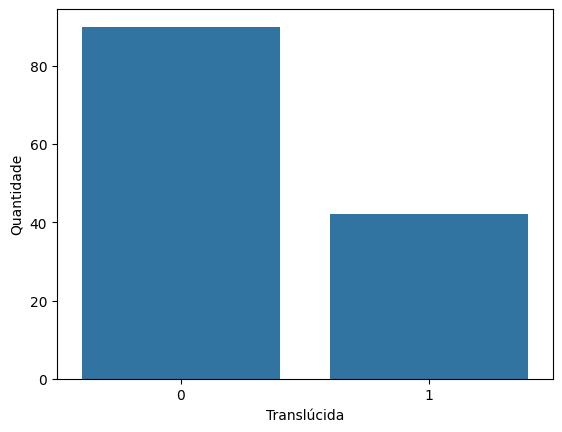

In [119]:

# 1 = SIM
# 0 = NÃO
plt.figure()
sns.countplot(df, x='Translucida')
plt.xlabel('Translúcida')
plt.ylabel('Quantidade')
plt.show()

### Ponto de Nuvem

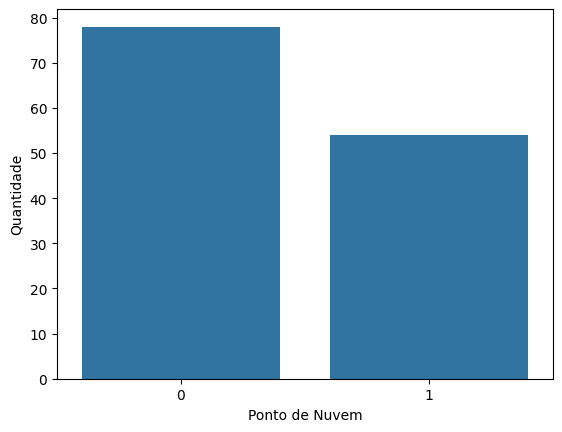

In [120]:

plt.figure()
sns.countplot(df, x='PontoDeNuvem')
plt.xlabel('Ponto de Nuvem')
plt.ylabel('Quantidade')
plt.show()

### Lipídio 1

In [121]:
df_lipidio_1 = df['Lipidio1'].value_counts().reset_index()
df_lipidio_1

,Lipidio1,count
0,Manteiga de cupuaçu,44
1,Manteiga de murumuru,33
2,Manteiga de Tucumã,22
3,Manteiga de Ucuuba,11
4,Manteiga de Manga,11
5,Manteiga de Bacuri,11


### Lipídio 2

In [122]:
df_lipidio_2 = df['Lipidio2'].value_counts().reset_index()
df_lipidio_2

,Lipidio2,count
0,Óleo de Pequi,22
1,Óleo de Açaí,22
2,Óleo de Tucumã,11
3,Óleo de urucum,11
4,Manteiga de cacau,11
5,Óleo de Buriti,11
6,Óleo de Jambu,11
7,Óleo de andiroba,11
8,Óleo de Pracaxi,11
9,Manteiga de cupuaçu,11


### Correlação Lipídios x PDI

In [123]:
df[df['pdi'] < 0.3][['Lipidio1']].value_counts().reset_index()

,Lipidio1,count
0,Manteiga de murumuru,22
1,Manteiga de Tucumã,16
2,Manteiga de cupuaçu,9
3,Manteiga de Ucuuba,6
4,Manteiga de Bacuri,2
5,Manteiga de Manga,1


In [124]:
df[df['pdi'] < 0.3][['Lipidio2']].value_counts().reset_index()

,Lipidio2,count
0,Óleo de Açaí,10
1,Óleo de Tucumã,9
2,Óleo de urucum,7
3,Óleo de Jambu,7
4,Óleo de Buriti,6
5,Manteiga de cupuaçu,6
6,Manteiga de cacau,4
7,Óleo de Pequi,4
8,Óleo de Pracaxi,2
9,Óleo de andiroba,1


In [125]:

df[df['pdi'] < 0.3][['Lipidio1','Lipidio2']].value_counts().reset_index()

,Lipidio1,Lipidio2,count
0,Manteiga de Tucumã,Óleo de Tucumã,9
1,Manteiga de murumuru,Óleo de Açaí,9
2,Manteiga de Tucumã,Óleo de urucum,7
3,Manteiga de murumuru,Óleo de Jambu,7
4,Manteiga de Ucuuba,Óleo de Buriti,6
5,Manteiga de murumuru,Manteiga de cupuaçu,6
6,Manteiga de cupuaçu,Manteiga de cacau,4
7,Manteiga de cupuaçu,Óleo de Pequi,4
8,Manteiga de Bacuri,Óleo de Pracaxi,2
9,Manteiga de Manga,Óleo de andiroba,1


<Axes: >

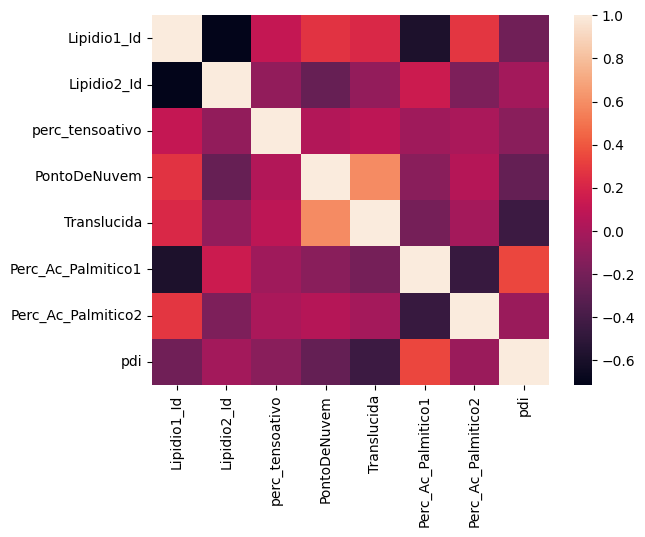

In [126]:
df['Lipidio1_Id'] = LabelEncoder().fit_transform(df['Lipidio1'])
df['Lipidio2_Id'] = LabelEncoder().fit_transform(df['Lipidio2'])

sns.heatmap(df[['Lipidio1_Id', 'Lipidio2_Id', 'perc_tensoativo', 'PontoDeNuvem','Translucida', 'Perc_Ac_Palmitico1', 'Perc_Ac_Palmitico2', 'pdi']].corr())

In [127]:
df

,formulacao,manteiga_1,manteiga_2,oleo,perc_manteiga_1,perc_manteiga_2,perc_tensoativo,pdi,tamanho,Translucida,...,Perc_Ac_Miristico2,Perc_Ac_Palmitoleico2,Perc_Ac_Beenico2,Perc_Ac_Valerico2,Perc_Ac_Araquidico2,Perc_Outros2,Perc_AG_Saturados2,Perc_AG_Insaturados2,Lipidio1_Id,Lipidio2_Id
0,1,Tucumã,0,Tucumã,25.00,0.00,50.00,0.104,31.49,1,...,0.0,0.0,0.0,0.0,NaN,0.0,27.0,73.0,2,7
1,2,Tucumã,0,Tucumã,16.65,0.00,33.35,0.131,91.71,1,...,0.0,0.0,0.0,0.0,NaN,0.0,27.0,73.0,2,7
2,3,Tucumã,0,Tucumã,50.00,0.00,33.35,0.135,87.85,1,...,0.0,0.0,0.0,0.0,NaN,0.0,27.0,73.0,2,7
3,4,Tucumã,0,Tucumã,37.50,0.00,25.00,0.252,105.20,0,...,0.0,0.0,0.0,0.0,NaN,0.0,27.0,73.0,2,7
4,5,Tucumã,0,Tucumã,25.00,0.00,25.00,0.299,150.00,0,...,0.0,0.0,0.0,0.0,NaN,0.0,27.0,73.0,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,7,Murumuru,Cupuaçu,0,50.00,25.00,25.00,0.430,165629.00,0,...,0.0,0.0,1.5,0.0,NaN,3.0,55.0,45.0,5,1
128,8,Murumuru,Cupuaçu,0,33.35,16.65,50.00,0.152,28658.00,1,...,0.0,0.0,1.5,0.0,NaN,3.0,55.0,45.0,5,1
129,9,Murumuru,Cupuaçu,0,16.65,25.00,58.35,0.327,31543.00,1,...,0.0,0.0,1.5,0.0,NaN,3.0,55.0,45.0,5,1
130,10,Murumuru,Cupuaçu,0,33.35,50.00,16.65,0.249,500398.00,0,...,0.0,0.0,1.5,0.0,NaN,3.0,55.0,45.0,5,1


# Análise de Correlações
Agora, iremos analisar as propriedades dos lipídios que mais impactaram para o PDI.

In [128]:
print(df.columns)
df.drop(columns=['formulacao', 'Translucida', 'PontoDeNuvem'], inplace=True)
df = df.fillna(0)

Index(['formulacao', 'manteiga_1', 'manteiga_2', 'oleo', 'perc_manteiga_1',
       'perc_manteiga_2', 'perc_tensoativo', 'pdi', 'tamanho', 'Translucida',
       'PontoDeNuvem', 'Lipidio1', 'PontoFusao1', 'Perc_Ac_Palmitico1',
       'Perc_Ac_Estearico1', 'Perc_Ac_Oleico1', 'Perc_Ac_Linoleico1',
       'Perc_Ac_Vacenico1', 'Perc_Ac_Linolenico1', 'Perc_Ac_Caprilico1',
       'Perc_Ac_Caprico1', 'Perc_Ac_Laurico1', 'Perc_Ac_Miristico1',
       'Perc_Ac_Palmitoleico1', 'Perc_Ac_Beenico1', 'Perc_Ac_Valerico1',
       'Perc_Ac_Araquidico1', 'Perc_Outros1', 'Perc_AG_Saturados1',
       'Perc_AG_Insaturados1', 'Lipidio2', 'PontoFusao2', 'Perc_Ac_Palmitico2',
       'Perc_Ac_Estearico2', 'Perc_Ac_Oleico2', 'Perc_Ac_Linoleico2',
       'Perc_Ac_Vacenico2', 'Perc_Ac_Linolenico2', 'Perc_Ac_Caprilico2',
       'Perc_Ac_Caprico2', 'Perc_Ac_Laurico2', 'Perc_Ac_Miristico2',
       'Perc_Ac_Palmitoleico2', 'Perc_Ac_Beenico2', 'Perc_Ac_Valerico2',
       'Perc_Ac_Araquidico2', 'Perc_Outros2', 'Perc_AG_S

In [ ]:
df['Lipidio1_Id'] = LabelEncoder().fit_transform(df['Lipidio1'])
df['Lipidio2_Id'] = LabelEncoder().fit_transform(df['Lipidio2'])

# Vamos remover o Perc_Ac_Araquidico 1 e 2 porque estão preenchidos apenas em 1 formulação
df = df.drop(columns=['Perc_Ac_Vacenico1', 'Perc_Ac_Vacenico2', 'Perc_Ac_Caprico1', 'Perc_Ac_Caprico2', 'Perc_Ac_Araquidico1', 'Perc_Ac_Araquidico2'])
corr_matrix = df.corr(numeric_only=True)


cols = corr_matrix['pdi'][corr_matrix['pdi'] > 0].index.tolist()
corr_matrix = corr_matrix.loc[cols, cols]
sns.heatmap(corr_matrix)
print(corr_matrix.reset_index().sort_values(by="pdi", ascending=False))

KeyError: "['Perc_Ac_Acenico1', 'Perc_Ac_Acenico2', 'Perc_Ac_Araquidico1', 'Perc_Ac_Araquidico2'] not found in axis"

In [130]:
corr_matrix.sort_values(by='pdi')

,perc_manteiga_1,pdi,PontoFusao1,Perc_Ac_Palmitico1,Perc_Ac_Estearico1,Perc_Ac_Oleico1,Perc_Ac_Palmitoleico1,Perc_Ac_Beenico1,Perc_Outros1,Perc_AG_Insaturados1,PontoFusao2,Perc_Ac_Oleico2,Perc_Ac_Caprico2,Perc_Ac_Palmitoleico2,Perc_Ac_Beenico2,Perc_Ac_Valerico2,Perc_Outros2,Perc_AG_Saturados2,Perc_AG_Insaturados2
PontoFusao2,0.270612,0.016213,0.209701,0.002645,0.174685,0.142258,-0.024218,0.127774,0.127774,0.184723,1.000000,0.001990,-0.001238,-0.558962,0.022523,0.236506,0.066497,0.536768,-0.582085
Perc_AG_Saturados2,0.060630,0.044663,-0.285102,0.039664,0.495438,0.535598,-0.131748,0.483491,0.483491,0.547639,0.536768,-0.001870,0.019932,0.009374,0.053268,-0.196904,0.114932,1.000000,-0.108618
Perc_Ac_Palmitoleico2,-0.405003,0.049259,-0.286955,-0.185846,0.312586,0.277053,-0.049117,0.359258,0.359258,0.312228,-0.558962,0.139001,-0.204251,1.000000,-0.223412,-0.204251,-0.256792,0.009374,0.238469
Perc_Ac_Palmitoleico1,-0.200840,0.088967,0.095942,0.655892,-0.554401,-0.379837,1.000000,-0.478510,-0.478510,-0.311797,-0.024218,-0.181085,0.670409,-0.049117,0.701202,-0.204037,0.748630,-0.131748,-0.282181
Perc_Ac_Estearico1,0.139786,0.112917,-0.429862,-0.278529,1.000000,0.939610,-0.554401,0.728315,0.728315,0.944080,0.174685,0.032722,-0.289904,0.312586,-0.310055,-0.289904,-0.346504,0.495438,-0.121420
Perc_Ac_Beenico1,0.133526,0.115077,-0.556267,-0.151818,0.728315,0.769314,-0.478510,1.000000,1.000000,0.755136,0.127774,-0.013670,-0.213201,0.359258,-0.231784,-0.213201,-0.268044,0.483491,-0.124047
Perc_Outros1,0.133526,0.115077,-0.556267,-0.151818,0.728315,0.769314,-0.478510,1.000000,1.000000,0.755136,0.127774,-0.013670,-0.213201,0.359258,-0.231784,-0.213201,-0.268044,0.483491,-0.124047
Perc_AG_Insaturados2,-0.116265,0.120171,0.220073,0.088257,-0.121420,-0.092354,-0.282181,-0.124047,-0.124047,-0.163679,-0.582085,0.579142,0.093741,0.238469,0.078007,0.264437,0.047105,-0.108618,1.000000
perc_manteiga_1,1.000000,0.120379,-0.002296,0.062065,0.139786,0.171328,-0.200840,0.133526,0.133526,0.139152,0.270612,-0.046012,0.056835,-0.405003,0.062302,0.056936,0.071482,0.060630,-0.116265
Perc_Ac_Valerico2,0.056936,0.149910,0.901334,-0.090629,-0.289904,-0.402526,-0.204037,-0.213201,-0.213201,-0.377708,0.236506,0.405484,-0.090909,-0.204251,-0.099639,1.000000,-0.114294,-0.196904,0.264437


<Axes: >

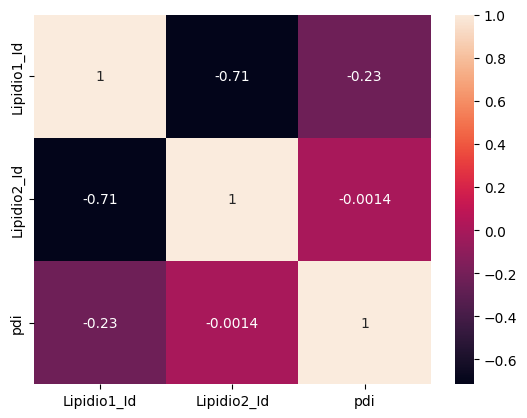

In [131]:
df[['Lipidio1_Id', 'Lipidio2_Id', 'pdi']].corr()

sns.heatmap(df[['Lipidio1_Id', 'Lipidio2_Id', 'pdi']].corr(), annot=True)

<Axes: >

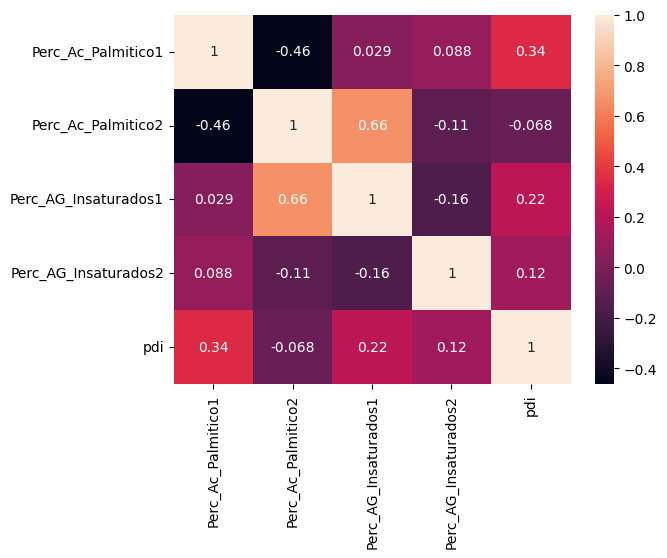

In [132]:
df[['Lipidio1_Id', 'Lipidio2_Id', 'pdi']].corr()

sns.heatmap(df[['Perc_Ac_Palmitico1', 'Perc_Ac_Palmitico2', 'Perc_AG_Insaturados1', 'Perc_AG_Insaturados2', 'pdi']].corr(), annot=True)